# Check James' AR(2) fit in the prediction vs projection paper

In [11]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.signal import detrend

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess

In [12]:
f = np.loadtxt("../../data/Cowtan_and_Way_HadCRUT4_kriging_1850-2020.txt")
y = f[:, 0]
t = detrend(f[:, 1])

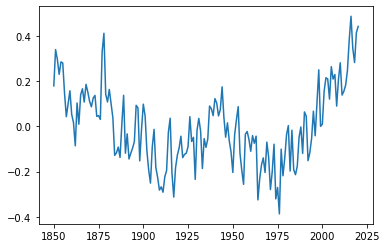

In [13]:
plt.plot(y, t)

In [14]:
mod = AutoReg(t, 2, trend="n")
res = mod.fit()

In [21]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  171
Model:                     AutoReg(2)   Log Likelihood                 139.676
Method:               Conditional MLE   S.D. of innovations              0.106
Date:                Wed, 25 May 2022   AIC                           -273.351
Time:                        13:34:44   BIC                           -263.962
Sample:                             2   HQIC                          -269.541
                                  171                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.7055      0.076      9.285      0.000       0.557       0.854
y.L2           0.1064      0.077      1.380      0.168      -0.045       0.258
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2001           +0.0000j            1.2001            0.0000
AR.2           -7.8300           +0.0000j            7.8300            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
ntimes = 20

ar = np.concatenate(([1], -res.params))
process = ArmaProcess(ar)

s = process.generate_sample(nsample=ntimes, scale=np.sqrt(res.sigma2))

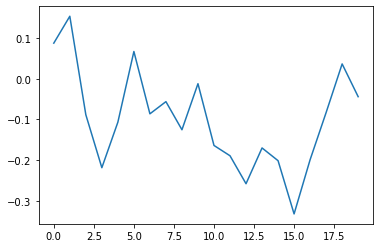

In [18]:
plt.plot(s)